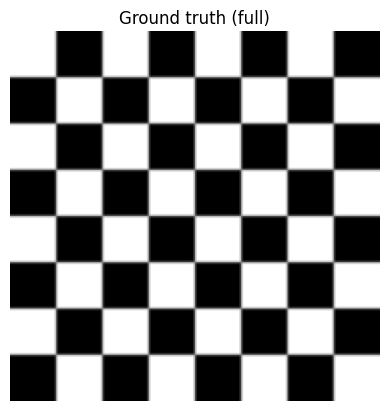

In [1]:
import os, numpy as np, jax
from flax.serialization import from_bytes
from run_inpaint import NeuralImage, coords, H, W
import matplotlib.pyplot as plt
import os

In [2]:
# load all params
ensemble = []
predictor = NeuralImage()
template = predictor.init(jax.random.PRNGKey(0), coords)['params']
for fname in os.listdir("ensembles_chkr"):
    if not fname.endswith(".msgpack"): continue
    data = open(os.path.join("ensembles_chkr", fname), "rb").read()
    params = from_bytes(template, data)
    ensemble.append(params)

# run each net on full grid
preds = []
for params in ensemble:
    p = predictor.apply({"params": params}, coords)
    preds.append(np.array(p))


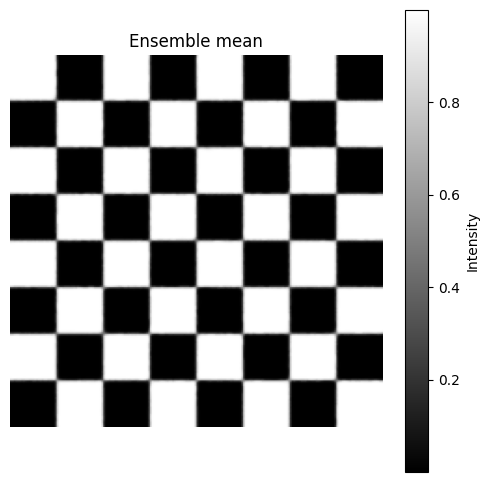

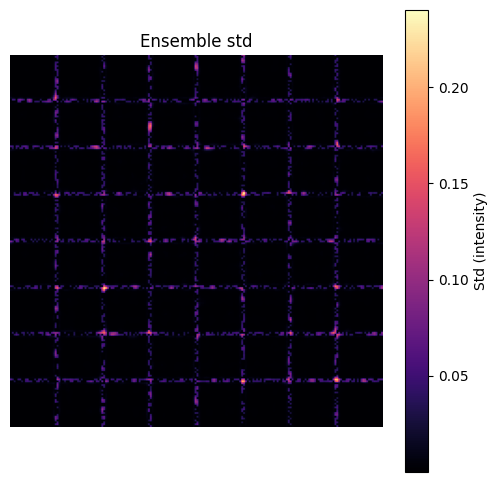

: 

In [ ]:
E = np.stack(preds, axis=0)
mean_img = E.mean(axis=0)
std_img = E.std(axis=0)

# mean
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(mean_img, cmap="gray")
ax.set_title("Ensemble mean")
ax.axis("off")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Intensity")

# std
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(std_img, cmap="magma")
ax.set_title("Ensemble std")
ax.axis("off")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Std (intensity)")

plt.show()